# Datasety

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [3]:
filename = "dataset/labor.csv"
labor = pd.read_csv(filename, sep='\t')
labor.head()

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
0,0,6.56611,0.0,71.34866,49.93293,4.01096,7.63611,16.53642,4.12686,62.82161,38.94182,613-31-7943,married,6.15761,no,7.24929,7.40249,Terry Walker
1,1,6.57510,0.0,73.19819,50.61146,7.36386,4.45735,12.41316,6.89853,64.10856,39.93677,071-29-7068,widowed,5.02794,no,7.41189,7.05999,Christopher Mccall
2,2,7.46203,1.0,12.80221,45.76702,7.86319,6.46036,7.75601,6.02906,62.88964,36.82128,465-01-6369,married,4.67262,Y,9.91113,5.59064,Mrs. Alisha Jackson DVM
3,3,5.15667,1.0,86.69531,41.73339,4.49672,3.99015,3.84333,6.71704,72.09725,64.70210,698-87-9617,single,6.40977,Y,6.55248,5.71480,Crystal Dean
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza


In [4]:
filename = "dataset/profiles.csv"
profiles = pd.read_csv(filename, sep='\t')
profiles.head()

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location
0,0,A-,Pension scheme manager,F,Megan Wells,Smith-Lawrence,Indian,788-45-8299,"08/15/1913, 00:00:00","(Decimal('-2.7462585'), Decimal('-56.259761'))"
1,1,AB+,"Psychotherapist, child",F,Barbara Patel,Oneal and Sons,Hawaiian,291-49-5180,"10/29/1905, 00:00:00","(Decimal('-54.1724985'), Decimal('163.273340'))"
2,2,B-,"Engineer, drilling",F,Brianna Lane,Morris-Arnold,Asian,146-49-1796,1980/05/13,"(Decimal('39.8342665'), Decimal('-54.720127'))"
3,3,A-,"Engineer, mining",M,William Cooper,Dunn LLC,White,700-73-0733,1921-12-14,"(Decimal('-76.8352515'), Decimal('-0.539735'))"
4,4,A+,Restaurant manager,F,Holly Williams,Bailey-Sullivan,White,748-70-9973,1924-12-30,"(Decimal('-59.667122'), Decimal('81.468274'))"


# 1. Základný opis dát spolu s ich charakteristikami
- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

In [5]:
# number of records profiles
profiles.shape[0]

3123

In [6]:
# number of records labor
labor.shape[0]

9976

In [7]:
# number of atributes profiles
profiles.columns.size

10

In [8]:
# number of atributes labor
labor.columns.size

18

In [9]:
# types of atributes profiles
profiles.dtypes

Unnamed: 0           int64
blood_group         object
job                 object
sex                 object
name                object
company             object
race                object
ssn                 object
birthdate           object
current_location    object
dtype: object

In [10]:
# types of atributes labor
labor.dtypes

Unnamed: 0        int64
etytr           float64
indicator       float64
alp             float64
er-cv           float64
leukocyty       float64
hbver           float64
alt             float64
trombocyty      float64
ast             float64
weight          float64
ssn              object
relationship     object
hematokrit      float64
smoker           object
hemoglobin      float64
erytrocyty      float64
name             object
dtype: object

<AxesSubplot:>

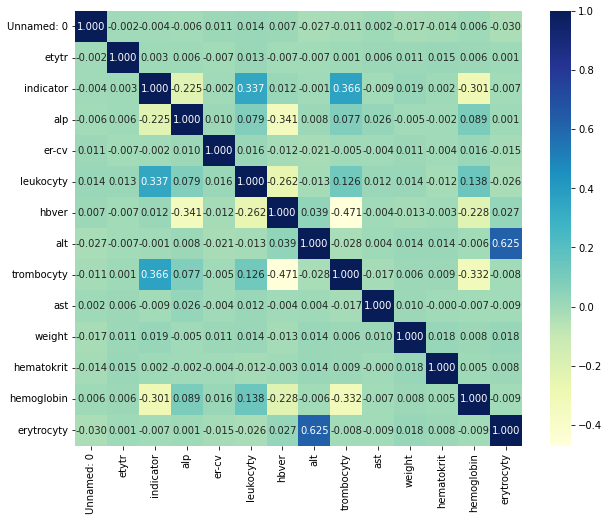

In [11]:
# Correlations heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(labor.corr(), ax=ax,cmap="YlGnBu", annot=True, fmt=".3f")

In [12]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'erytrocyty']].describe()

,hemoglobin,hbver,trombocyty,leukocyty,alt,erytrocyty
count,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9945.000000
mean,6.200070,5.783637,6.584805,5.396771,9.167064,5.798073
std,1.705544,1.682270,1.471984,1.549857,3.934239,1.006324
min,0.810320,0.465590,0.967360,0.000000,0.000000,1.599500
25%,4.925607,4.552373,5.644348,4.279130,6.836912,5.130850
50%,6.222180,5.928270,6.708440,5.185765,8.660790,5.800240
75%,7.421258,7.065975,7.569437,6.421222,10.754530,6.470690
max,12.119600,11.636340,11.911000,11.345060,100.000000,9.950430


In [13]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'erytrocyty']].median()

hemoglobin    6.222180
hbver         5.928270
trombocyty    6.708440
leukocyty     5.185765
alt           8.660790
erytrocyty    5.800240
dtype: float64

In [14]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'erytrocyty']].skew()

hemoglobin    0.045604
hbver        -0.255204
trombocyty   -0.230527
leukocyty     0.389468
alt           3.683199
erytrocyty    0.010909
dtype: float64

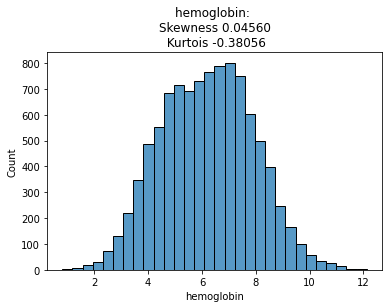

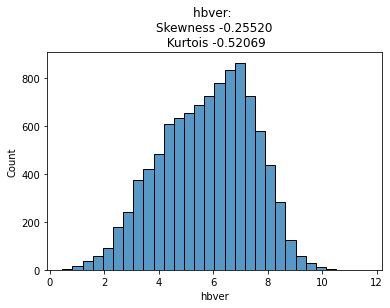

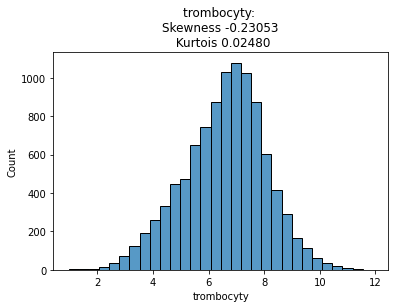

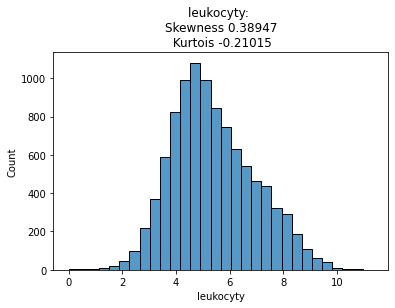

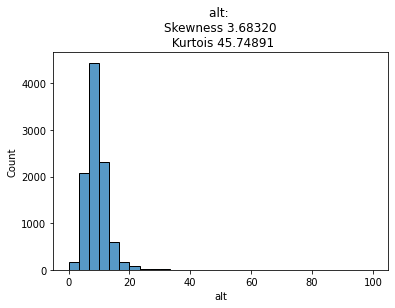

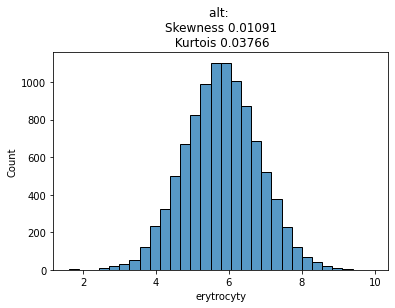

In [15]:
sns.histplot(labor.hemoglobin, bins=30)
plt.title("hemoglobin: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hemoglobin.skew(), labor.hemoglobin.kurtosis()))
plt.show()

sns.histplot(labor.hbver, bins=30)
plt.title("hbver: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hbver.skew(), labor.hbver.kurtosis()))

plt.show()

sns.histplot(labor.trombocyty, bins=30)
plt.title("trombocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.trombocyty.skew(), labor.trombocyty.kurtosis()))
plt.show()

sns.histplot(labor.leukocyty, bins=30)
plt.title("leukocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.leukocyty.skew(), labor.leukocyty.kurtosis()))
plt.show()

sns.histplot(labor.alt, bins=30)
plt.title("alt: \n""Skewness %.5f\n Kurtois %.5f" % (labor.alt.skew(), labor.alt.kurtosis()))
plt.show()

sns.histplot(labor.erytrocyty, bins=30)
plt.title("alt: \n""Skewness %.5f\n Kurtois %.5f" % (labor.erytrocyty.skew(), labor.erytrocyty.kurtosis()))
plt.show()

# 2. Párová analýza
- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.

<AxesSubplot:>

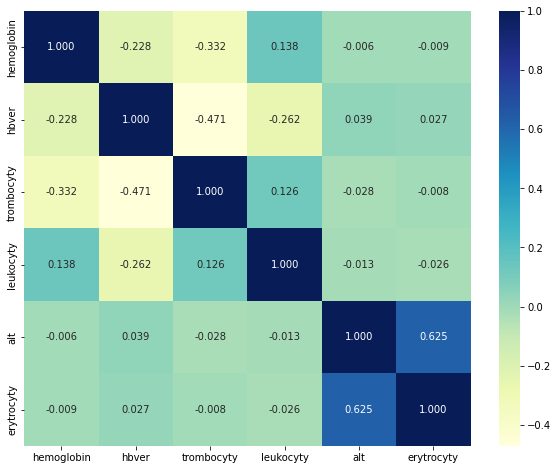

In [16]:
# Correlations heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'erytrocyty']].corr(), ax=ax,cmap="YlGnBu", annot=True, fmt=".3f")

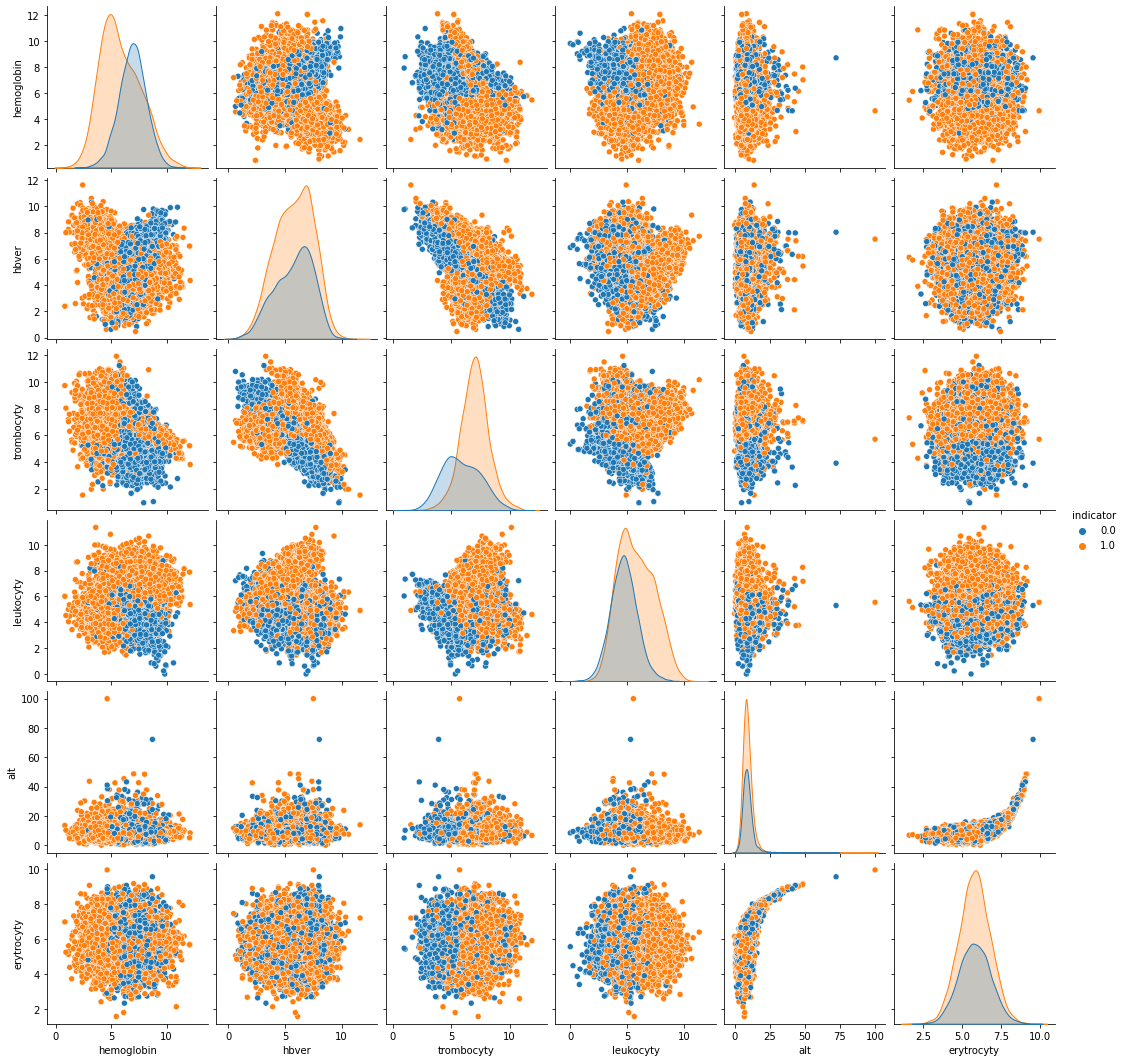

In [17]:
sns.pairplot(labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'indicator', 'erytrocyty']], hue='indicator')

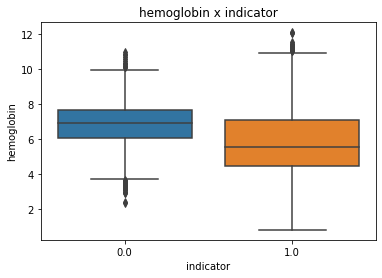

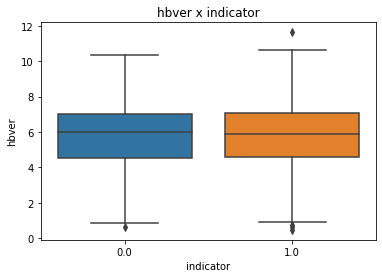

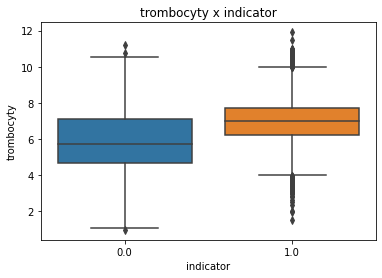

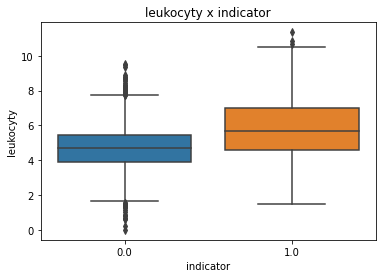

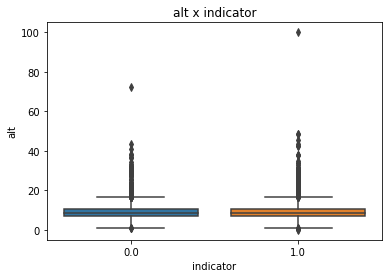

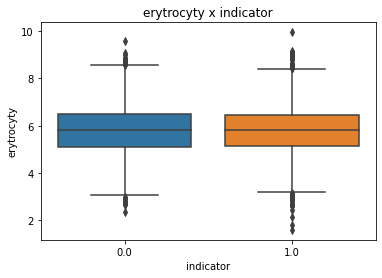

In [18]:
for attr in ['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'erytrocyty']:
    sns.boxplot(data=labor, x='indicator', y=attr)
    plt.title(attr + ' x indicator')
    plt.show()

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

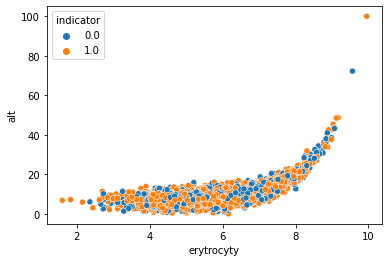

In [19]:
sns.scatterplot(x='erytrocyty',  y='alt', data=labor,hue='indicator')

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

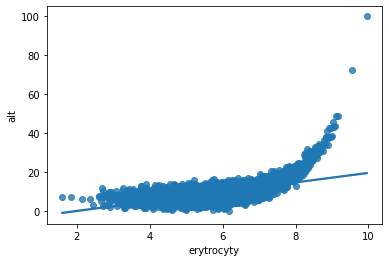

In [20]:
sns.regplot(x="erytrocyty", y="alt", data=labor)

In [21]:
labor['erytrocyty'].corr(labor['alt'])

0.6249049735041573

<AxesSubplot:xlabel='trombocyty', ylabel='hbver'>

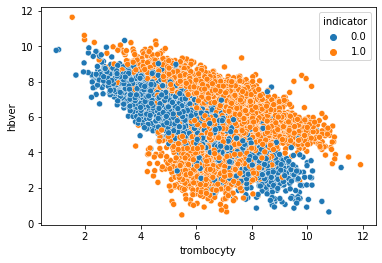

In [22]:
sns.scatterplot(x='trombocyty',  y='hbver', data=labor,hue='indicator')

<AxesSubplot:xlabel='trombocyty', ylabel='hbver'>

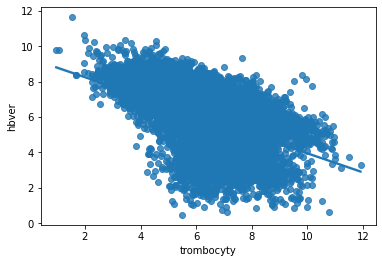

In [23]:
sns.regplot(x="trombocyty", y="hbver", data=labor)

In [24]:
labor['trombocyty'].corr(labor['hbver'])

-0.47085262414364143

<AxesSubplot:xlabel='trombocyty', ylabel='hemoglobin'>

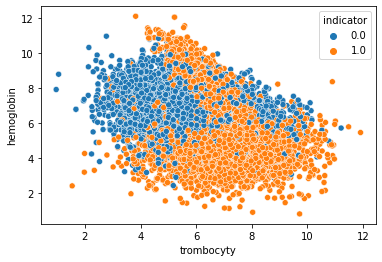

In [98]:
sns.scatterplot(x='trombocyty',  y='hemoglobin', data=labor,hue='indicator')

<AxesSubplot:xlabel='trombocyty', ylabel='hemoglobin'>

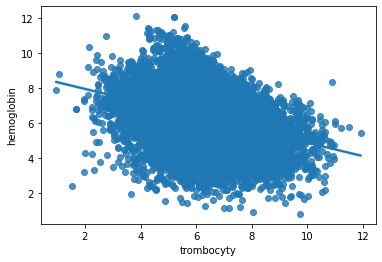

In [99]:
sns.regplot(x="trombocyty", y="hemoglobin", data=labor)

In [100]:
labor['trombocyty'].corr(labor['hemoglobin'])

-0.3322056174220032

# 3. Formulácia a štatistické overenie hypotéz o dátach (2 body)
- Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
- Sformulované hypotézy overte vhodne zvoleným štatistickým testom.


## Hypotéza 1
*H0*: Hodnota hemoglobínu zdravých pacientov je v priemere rovnaká ako u chorých pacientov.
*HA*: Hodnota hemoglobínu zdravých pacientov je v priemere vyššia/nižšia ako u chorých pacientov.


In [28]:
healthy = labor.loc[labor.indicator == 0, 'hemoglobin'].dropna() 

In [29]:
healthy.describe()

count    3562.000000
mean        6.887613
std         1.217612
min         2.368140
25%         6.090463
50%         6.913745
75%         7.689430
max        10.978090
Name: hemoglobin, dtype: float64

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

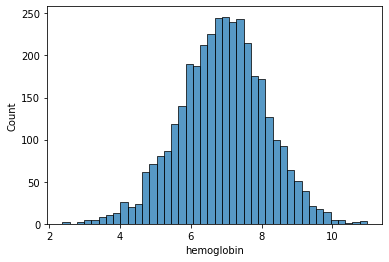

In [30]:
sns.histplot(healthy)

In [31]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    return a[(a > upper) | (a < lower)]

In [32]:
healthy_out = identify_outliers(healthy)
healthy_out

439     10.61623
482      2.89968
816     10.46731
1115    10.27534
1468     3.59432
1634     3.65550
1877    10.11474
2331     3.61415
2367     2.36814
2808     3.50878
3669    10.97809
3735    10.11834
3786    10.18691
3847     2.43278
4035     3.08637
4404     3.60716
4520     3.36164
4702     3.34058
4737     3.22984
4812    10.80082
4837     3.15525
5341     3.56267
5544     3.46322
5586    10.12194
6036     3.49933
6187     3.45408
6583    10.28324
6812    10.33342
7699     3.28312
7930    10.67910
8009     3.18123
8272     2.98759
8323    10.85719
8459     3.54479
9117     3.07850
9180     3.47922
9720     2.90425
Name: hemoglobin, dtype: float64

In [33]:
healthy = healthy.drop(healthy_out.index) 

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

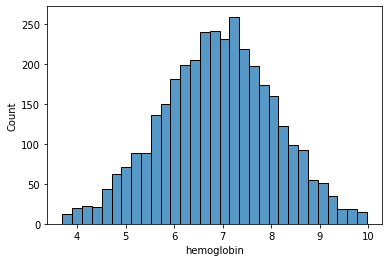

In [34]:
sns.histplot(healthy)

In [35]:
test_frame = labor.sample(n=4500)
unhealthy = test_frame.loc[test_frame.indicator == 1, 'hemoglobin'].dropna() 

In [36]:
unhealthy.describe()

count    2831.000000
mean        5.808748
std         1.813056
min         0.906140
25%         4.453905
50%         5.545130
75%         7.068235
max        12.066440
Name: hemoglobin, dtype: float64

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

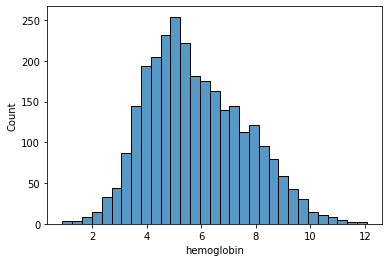

In [37]:
sns.histplot(unhealthy)

In [38]:
unhealthy_out = identify_outliers(unhealthy)
unhealthy_out

4758    11.36692
5020    12.06644
622     11.06054
7871    11.20070
3806    11.14014
8426    11.33724
6069    11.47082
6947    12.06644
4159    11.13085
Name: hemoglobin, dtype: float64

In [39]:
unhealthy = unhealthy.drop(unhealthy_out.index) 

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

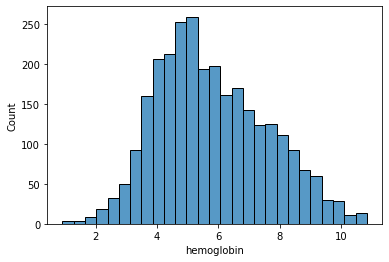

In [40]:
sns.histplot(unhealthy)

Outliers neboli najdení tým pádom ich nebolo treba odstraňovať.

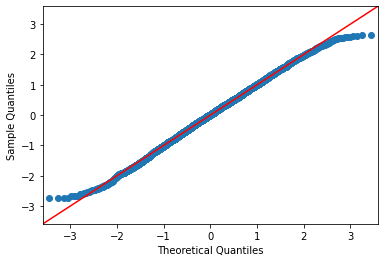

In [41]:
_ = sm.ProbPlot(healthy, fit=True).qqplot(line='45')

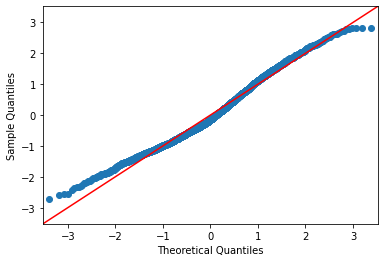

In [42]:
_ = sm.ProbPlot(unhealthy, fit=True).qqplot(line='45')

Shapiro-Willkov test normálnosti

In [43]:
stats.shapiro(healthy)

ShapiroResult(statistic=0.9978073835372925, pvalue=6.922722241142765e-05)

In [44]:
stats.shapiro(unhealthy)

ShapiroResult(statistic=0.9836692810058594, pvalue=1.6403097426044946e-17)

Podľa Shapiro-willkov testu normálnosti zamietne nulovú hypotézu a dáta nepochádzajú z normálneho rozdelenia

In [45]:
stats.levene(healthy, unhealthy)

LeveneResult(statistic=554.4211185718409, pvalue=1.3446367722822913e-117)

Podľa Levenovho testu vieme určiť, že vzorky zrejme pochádzajú z distribucíí s rovnakou varianciou

In [46]:
stats.mannwhitneyu(healthy, unhealthy)

MannwhitneyuResult(statistic=6995781.0, pvalue=5.542660726117105e-171)

Keďže chyba prvého rádu je menšie ako 1 promile, tak zamietame našu nulovú hypotézu v prospech alternatívnej hypotézy

In [47]:
sms.DescrStatsW(healthy).tconfint_mean()

(6.860643920100708, 6.937683092665248)

In [48]:
sms.DescrStatsW(unhealthy).tconfint_mean()

(5.724841472314045, 5.856820419960938)

<AxesSubplot:xlabel='indicator', ylabel='hemoglobin'>

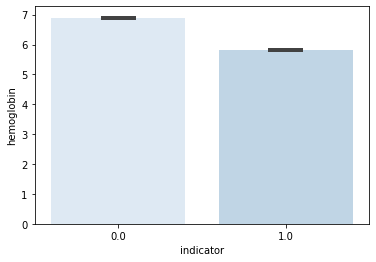

In [49]:
sns.barplot(x='indicator', y='hemoglobin', data=labor[(labor.indicator==0)|(labor.indicator==1)],capsize=0.2, errwidth=2, palette=sns.color_palette("Blues"))

Aj podľa grafov vidíme, že hodnota hemoglobínu u zdravých pacientov je priemerne vyššia ako hodnota hemoglobínu u chorých pacientov.

## Hypotéza 2
*H0*: Hodnota erytrocyty zdravých pacientov je v priemere rovnaká ako u chorých pacientov.
*HA*: Hodnota erytrocyty zdravých pacientov je v priemere vyššia/nižšia, menšie ako u chorých pacientov.

In [50]:
healthy_erytrocyty = labor.loc[labor.indicator == 0, 'erytrocyty'].dropna() 

In [51]:
healthy_erytrocyty.describe()

count    3558.000000
mean        5.807875
std         1.010541
min         2.357680
25%         5.117225
50%         5.803070
75%         6.498003
max         9.559990
Name: erytrocyty, dtype: float64

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

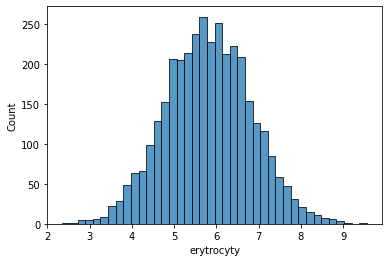

In [52]:
sns.histplot(healthy_erytrocyty)

In [53]:
healthy_erytrocyty_out = identify_outliers(healthy_erytrocyty)
healthy_erytrocyty_out

44      2.83198
256     9.55999
353     8.77578
1140    8.73768
1440    2.93465
1606    8.61541
1801    8.85864
2358    8.59704
2483    8.75396
2841    8.98971
3696    8.62926
4121    2.76214
5047    2.35768
6240    3.00306
6444    8.66575
7499    2.72305
7982    9.06617
8175    8.83662
8788    2.92640
8834    2.65822
8896    2.74850
8934    8.66328
8961    8.87136
9187    2.72877
9294    8.57463
Name: erytrocyty, dtype: float64

In [54]:
healthy_erytrocyty = healthy_erytrocyty.drop(healthy_erytrocyty_out.index) 

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

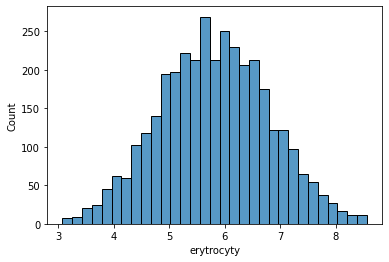

In [55]:
sns.histplot(healthy_erytrocyty)

In [56]:
test_frame = labor.sample(n=4500)
unhealthy_erytrocyty = test_frame.loc[test_frame.indicator == 1, 'erytrocyty'].dropna() 

In [57]:
unhealthy_erytrocyty.describe()

count    2865.000000
mean        5.799897
std         1.002077
min         2.153490
25%         5.152320
50%         5.802130
75%         6.459920
max         9.950430
Name: erytrocyty, dtype: float64

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

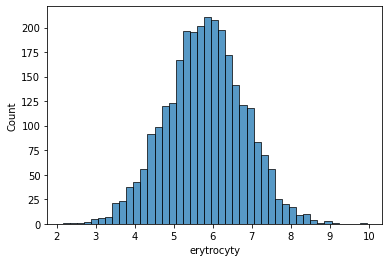

In [58]:
sns.histplot(unhealthy_erytrocyty)

In [59]:
unhealthy_erytrocyty_out = identify_outliers(unhealthy_erytrocyty)
unhealthy_erytrocyty_out

9721    8.58977
2317    2.88065
5365    2.85739
8985    2.15349
2246    9.95043
5516    9.07175
3183    3.16056
4102    3.04759
609     3.07324
3712    8.56691
64      8.45245
9896    3.11926
8512    8.98075
2522    2.99799
2974    8.45852
8045    8.51821
2026    8.43242
1872    8.97430
8793    2.85515
2384    8.83335
5803    2.88998
202     2.61868
9020    8.58366
3677    3.07512
681     2.43708
8703    3.01624
2405    8.90426
Name: erytrocyty, dtype: float64

In [60]:
unhealthy_erytrocyty = unhealthy_erytrocyty.drop(unhealthy_erytrocyty_out.index) 

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

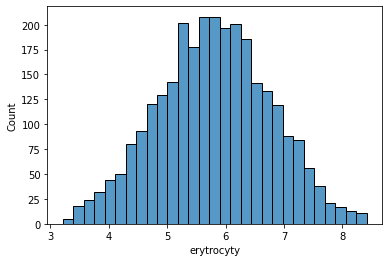

In [61]:
sns.histplot(unhealthy_erytrocyty)

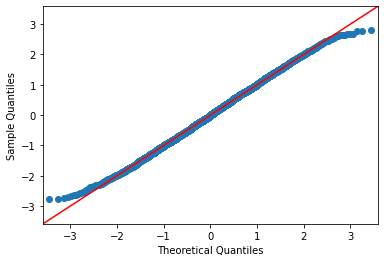

In [62]:
_ = sm.ProbPlot(healthy_erytrocyty, fit=True).qqplot(line='45')

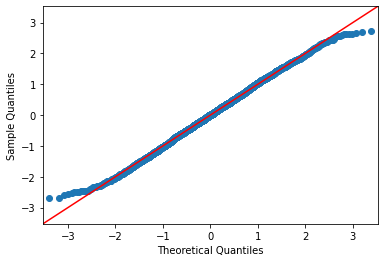

In [63]:
_ = sm.ProbPlot(unhealthy_erytrocyty, fit=True).qqplot(line='45')

In [64]:
stats.shapiro(healthy_erytrocyty)

ShapiroResult(statistic=0.9982246160507202, pvalue=0.0005400139489211142)

In [65]:
stats.shapiro(unhealthy_erytrocyty)

ShapiroResult(statistic=0.9977070093154907, pvalue=0.00034374711685813963)

Podľa Shapiro-willkov testu normálnosti zamietneme nulovú hypotézu a mali by sme použiť Mann-Whitneyho test

In [66]:
stats.levene(healthy_erytrocyty, unhealthy_erytrocyty)

LeveneResult(statistic=1.595640370407007, pvalue=0.20656836921630511)

Podľa Levenovho testu vieme určiť, že vzorky zrejme pochádzajú z distribucíí s rovnakou varianciou

In [67]:
stats.mannwhitneyu(healthy_erytrocyty, unhealthy_erytrocyty)

MannwhitneyuResult(statistic=5011333.0, pvalue=0.9782039898054927)

Podľa Man-Whineyuho testu sme zistili, že chyba 1.rádu je veľmi veľká a k Levenov test ukázal, že dáta pravdepodobne pochádzajú z distribúcií s rovnakou varianciou,
a tak našu Nulovú hypotézu H0 nezamietame ale potvrdzujeme

In [68]:
sms.DescrStatsW(healthy_erytrocyty).tconfint_mean()

(5.771343254452852, 5.836100838386091)

In [69]:
sms.DescrStatsW(unhealthy_erytrocyty).tconfint_mean()

(5.765157083085011, 5.8361162572955365)

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

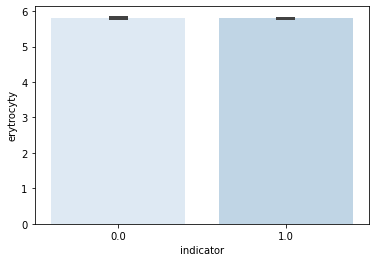

In [70]:
sns.barplot(x='indicator', y='erytrocyty', data=labor[(labor.indicator == 1) | (labor.indicator == 0)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Aj na grafe môžeme vidieť, že hodnoty sú vcelku rovnaké

# 4. Identifikácia problémov v dátach s navrhnutým riešením
- Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty.
- V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
- Navrhnuté riešenie prvotne realizujte na dátach. Problém s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa potreby.

In [71]:
# Number of Na profiles
profiles.shape[0] - profiles.dropna().shape[0]

0

In [72]:
# Number of Na labor
labor.shape[0] - labor.dropna().shape[0]

329

In [73]:
labor.isnull().sum()

Unnamed: 0       0
etytr           30
indicator        0
alp             31
er-cv           30
leukocyty       30
hbver           30
alt             30
trombocyty      30
ast             30
weight           0
ssn              0
relationship     0
hematokrit      31
smoker           0
hemoglobin      30
erytrocyty      31
name             0
dtype: int64

In [74]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3123 non-null   int64 
 1   blood_group       3123 non-null   object
 2   job               3123 non-null   object
 3   sex               3123 non-null   object
 4   name              3123 non-null   object
 5   company           3123 non-null   object
 6   race              3123 non-null   object
 7   ssn               3123 non-null   object
 8   birthdate         3123 non-null   object
 9   current_location  3123 non-null   object
dtypes: int64(1), object(9)
memory usage: 244.1+ KB


In [75]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9976 non-null   int64  
 1   etytr         9946 non-null   float64
 2   indicator     9976 non-null   float64
 3   alp           9945 non-null   float64
 4   er-cv         9946 non-null   float64
 5   leukocyty     9946 non-null   float64
 6   hbver         9946 non-null   float64
 7   alt           9946 non-null   float64
 8   trombocyty    9946 non-null   float64
 9   ast           9946 non-null   float64
 10  weight        9976 non-null   float64
 11  ssn           9976 non-null   object 
 12  relationship  9976 non-null   object 
 13  hematokrit    9945 non-null   float64
 14  smoker        9976 non-null   object 
 15  hemoglobin    9946 non-null   float64
 16  erytrocyty    9945 non-null   float64
 17  name          9976 non-null   object 
dtypes: float64(13), int64(1), ob

In [76]:
# List all rows containing null values
labor[labor.isnull().any(axis=1)]

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
24,24,4.67870,0.0,40.61720,65.84055,4.81551,5.58746,4.68397,NaN,74.83465,113.12785,409-43-1283,divoced,6.09808,no,8.20259,4.17508,James Daniel
84,84,NaN,1.0,72.97158,40.64987,7.14212,6.02901,9.94711,7.47247,66.42493,86.01786,011-38-1168,married,4.39631,no,7.18545,4.14178,Meghan Garner
94,94,4.01809,1.0,32.26899,61.97734,5.68369,9.17297,13.87185,3.74418,72.40242,86.72634,409-43-1283,nop,5.83529,yes,4.09266,NaN,James Daniel
124,124,5.14318,0.0,80.12452,41.39639,NaN,6.83925,8.44584,4.68128,67.34317,35.53901,305-18-3975,separated,5.57690,yes,7.07607,4.59136,Mary Carpenter
208,208,5.24823,1.0,24.92220,30.79911,3.93760,6.47111,33.04987,8.46589,NaN,36.74598,037-76-4977,divoced,5.31014,yes,4.14145,8.63207,Regina Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,9844,5.78776,1.0,29.98515,71.16022,5.96796,7.64652,11.39465,NaN,50.24104,96.19817,748-70-9973,widowed,7.05456,yes,4.16839,5.83897,Holly Williams
9881,9881,5.88557,1.0,29.14889,36.05389,4.27246,6.55006,6.60883,8.14150,63.95205,86.46901,779-61-1579,separated,4.11969,Y,3.98632,NaN,Cathy Dean
9888,9888,NaN,1.0,58.21868,42.68911,4.14231,7.90606,6.88902,5.64783,80.65205,111.07323,548-78-1335,divoced,5.82836,no,4.76667,6.42993,Christopher Cortez
9908,9908,5.03432,0.0,90.70412,52.55536,NaN,7.08549,5.04675,3.80445,78.18837,40.77415,366-67-6100,single,5.30154,no,5.94084,4.93684,Alexandria Knapp


In [77]:
#save data to file 
#df.to_csv('dataset/<filename>.tsv', sep='\t', index=False, encoding='utf-8')

In [78]:
labor = labor.rename(columns={'Unnamed: 0':'id_labor'})
labor.set_index('id_labor')

,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
id_labor,,,,,,,,,,,,,,,,,
0,6.56611,0.0,71.34866,49.93293,4.01096,7.63611,16.53642,4.12686,62.82161,38.94182,613-31-7943,married,6.15761,no,7.24929,7.40249,Terry Walker
1,6.57510,0.0,73.19819,50.61146,7.36386,4.45735,12.41316,6.89853,64.10856,39.93677,071-29-7068,widowed,5.02794,no,7.41189,7.05999,Christopher Mccall
2,7.46203,1.0,12.80221,45.76702,7.86319,6.46036,7.75601,6.02906,62.88964,36.82128,465-01-6369,married,4.67262,Y,9.91113,5.59064,Mrs. Alisha Jackson DVM
3,5.15667,1.0,86.69531,41.73339,4.49672,3.99015,3.84333,6.71704,72.09725,64.70210,698-87-9617,single,6.40977,Y,6.55248,5.71480,Crystal Dean
4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,4.92591,0.0,22.84636,47.26370,2.48835,6.95191,24.40903,6.90815,70.22225,8.04015,124-16-4553,widowed,6.28803,no,8.70110,8.30753,Danny Williams
9972,5.88588,0.0,77.34828,75.18520,4.28394,5.78731,8.08100,5.32133,75.46584,87.02870,801-46-6436,widowed,4.70667,yes,5.27741,6.64176,Kimberly Burch
9973,5.94623,1.0,73.75165,37.08749,6.45990,4.82462,5.78515,6.80749,62.35952,28.06520,103-41-5796,married,4.71323,no,7.43538,5.87397,Wayne Norman


In [79]:
# Weight is below 0
labor[labor['weight'] < 0]

,id_labor,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza
12,12,7.45985,0.0,44.89612,71.06880,2.82551,4.25394,8.92940,8.18667,69.71307,-7.45880,057-52-4512,divoced,5.21050,yes,8.09933,6.40121,Donna Acosta
47,47,5.76418,0.0,83.77569,37.34492,4.86190,5.03589,11.24835,6.41601,72.85593,-10.98075,280-99-3868,widowed,5.46548,no,5.65429,4.78133,Christina Harris
66,66,7.40217,1.0,15.34635,52.40322,4.49002,9.83963,13.33373,3.73180,64.56452,-20.43153,191-13-3353,divoced,6.58267,no,3.17575,7.52013,Casey Harris
197,197,5.07686,0.0,84.97279,43.97857,3.98114,7.14523,7.49582,4.57366,74.14419,-5.83706,744-63-3326,married,3.98797,N,6.94458,6.50220,Lisa Santana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,9868,3.79981,0.0,34.62625,56.27918,3.75853,8.46265,6.43348,3.57446,80.12457,-0.75156,148-05-5204,nop,7.43917,yes,8.20493,5.66157,Kimberly Oneal
9876,9876,6.07822,1.0,78.91486,57.24705,7.08122,3.89736,9.86064,7.58186,85.47576,-3.04102,334-01-9397,nop,6.77781,yes,5.62884,4.09318,Timothy Miller
9882,9882,6.65452,0.0,23.74081,63.90448,5.79564,8.73818,8.34635,2.72969,70.85690,-10.42991,466-65-7754,single,5.50550,yes,8.57765,6.33862,Ralph Chen
9897,9897,7.08630,0.0,67.54793,63.45475,4.56532,4.25441,10.10955,7.22103,70.47193,-8.55406,877-59-5554,single,6.77324,no,7.46819,3.84360,Stephanie Estrada


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

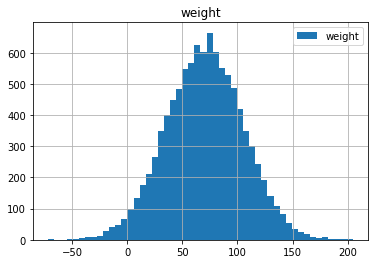

In [80]:
labor.hist(column='weight', legend=1, bins=50)

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

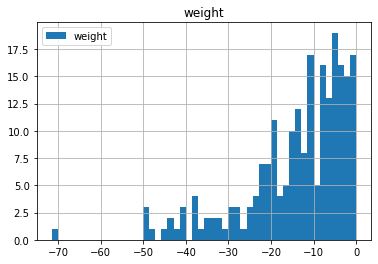

In [81]:
labor[labor['weight'] <= 0].hist(column='weight', legend=1, bins=50)

In [82]:
len(labor[labor['weight'] <= 0])

220

In [83]:
#convert to date 
profiles.birthdate = pd.to_datetime(profiles.birthdate)

In [84]:
profiles = profiles.rename(columns={'Unnamed: 0':'id_profiles'})
profiles.set_index('id_profiles')

,blood_group,job,sex,name,company,race,ssn,birthdate,current_location
id_profiles,,,,,,,,,
0,A-,Pension scheme manager,F,Megan Wells,Smith-Lawrence,Indian,788-45-8299,1913-08-15,"(Decimal('-2.7462585'), Decimal('-56.259761'))"
1,AB+,"Psychotherapist, child",F,Barbara Patel,Oneal and Sons,Hawaiian,291-49-5180,1905-10-29,"(Decimal('-54.1724985'), Decimal('163.273340'))"
2,B-,"Engineer, drilling",F,Brianna Lane,Morris-Arnold,Asian,146-49-1796,1980-05-13,"(Decimal('39.8342665'), Decimal('-54.720127'))"
3,A-,"Engineer, mining",M,William Cooper,Dunn LLC,White,700-73-0733,1921-12-14,"(Decimal('-76.8352515'), Decimal('-0.539735'))"
4,A+,Restaurant manager,F,Holly Williams,Bailey-Sullivan,White,748-70-9973,1924-12-30,"(Decimal('-59.667122'), Decimal('81.468274'))"
...,...,...,...,...,...,...,...,...,...
3118,AB+,Hotel manager,F,Wendy Hopkins,"Edwards, Hicks and Brown",White,093-80-1903,2010-10-29,"(Decimal('-51.369791'), Decimal('169.810393'))"
3119,B+,Learning disability nurse,M,Jason Harris,Villanueva Inc,Asian,455-15-7740,1939-10-02,"(Decimal('0.2157865'), Decimal('2.399022'))"
3120,B-,Early years teacher,F,Carolyn Roberson,Gomez-Salas,White,857-79-0008,2002-11-21,"(Decimal('-31.7996455'), Decimal('-159.330298'))"


In [85]:
profiles.groupby('race').count()

,id_profiles,blood_group,job,sex,name,company,ssn,birthdate,current_location
race,,,,,,,,,
Asian,333,333,333,333,333,333,333,333,333
Black,751,751,751,751,751,751,751,751,751
Hawaiian,148,148,148,148,148,148,148,148,148
Indian,149,149,149,149,149,149,149,149,149
White,1559,1559,1559,1559,1559,1559,1559,1559,1559
black,121,121,121,121,121,121,121,121,121
blsck,32,32,32,32,32,32,32,32,32
white,30,30,30,30,30,30,30,30,30


In [86]:
# Replace typos in race
profiles['race'].replace({'blsck':'Black', 'black':'Black', 'white':'White'}, inplace=True)

In [87]:
profiles.groupby('race').count().iloc[:,0]

race
Asian        333
Black        904
Hawaiian     148
Indian       149
White       1589
Name: id_profiles, dtype: int64

In [88]:
labor.groupby('smoker').count()

,id_labor,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,hemoglobin,erytrocyty,name
smoker,,,,,,,,,,,,,,,,,
N,472,469,472,471,472,470,470,471,468,470,472,472,472,471,470,469,472
Y,2012,2010,2012,2006,2007,2006,2005,2008,2006,2009,2012,2012,2012,2005,2005,2006,2012
no,5456,5438,5456,5436,5441,5441,5444,5437,5446,5438,5456,5456,5456,5439,5441,5441,5456
yes,2036,2029,2036,2032,2026,2029,2027,2030,2026,2029,2036,2036,2036,2030,2030,2029,2036


In [89]:
# normalize smoker answers for binary attributes
labor['smoker'].replace({'N':0, 'Y':1, 'no':0, 'yes':0}, inplace=True)

In [90]:
labor.groupby('smoker').count()

,id_labor,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,hemoglobin,erytrocyty,name
smoker,,,,,,,,,,,,,,,,,
0,7964,7936,7964,7939,7939,7940,7941,7938,7940,7937,7964,7964,7964,7940,7941,7939,7964
1,2012,2010,2012,2006,2007,2006,2005,2008,2006,2009,2012,2012,2012,2005,2005,2006,2012


In [91]:
labor.groupby('relationship').count()

,id_labor,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,hematokrit,smoker,hemoglobin,erytrocyty,name
relationship,,,,,,,,,,,,,,,,,
divoced,2561,2556,2561,2555,2555,2555,2554,2554,2556,2555,2561,2561,2553,2561,2553,2551,2561
married,2554,2542,2554,2552,2545,2546,2543,2548,2542,2544,2554,2554,2545,2554,2544,2549,2554
nop,964,959,964,960,960,960,963,961,963,960,964,964,961,964,962,961,964
separated,1008,1004,1008,1004,1005,1003,1004,1004,1007,1006,1008,1008,1006,1008,1005,1004,1008
single,1904,1902,1904,1894,1899,1897,1901,1895,1897,1900,1904,1904,1899,1904,1898,1898,1904
widowed,985,983,985,980,982,985,981,984,981,981,985,985,981,985,984,982,985


In [92]:
labor['relationship'].replace({'divoced':'divorced'})

0         married
1         widowed
2         married
3          single
4       separated
          ...    
9971      widowed
9972      widowed
9973      married
9974    separated
9975       single
Name: relationship, Length: 9976, dtype: object

In [93]:
profiles.groupby('blood_group').count()

,id_profiles,job,sex,name,company,race,ssn,birthdate,current_location
blood_group,,,,,,,,,
A+,380,380,380,380,380,380,380,380,380
A-,362,362,362,362,362,362,362,362,362
AB+,368,368,368,368,368,368,368,368,368
AB-,405,405,405,405,405,405,405,405,405
B+,420,420,420,420,420,420,420,420,420
B-,387,387,387,387,387,387,387,387,387
O+,413,413,413,413,413,413,413,413,413
O-,388,388,388,388,388,388,388,388,388


In [94]:
profiles.groupby('job').count()

,id_profiles,blood_group,sex,name,company,race,ssn,birthdate,current_location
job,,,,,,,,,
Academic librarian,7,7,7,7,7,7,7,7,7
Accommodation manager,8,8,8,8,8,8,8,8,8
"Accountant, chartered",4,4,4,4,4,4,4,4,4
"Accountant, chartered certified",6,6,6,6,6,6,6,6,6
"Accountant, chartered management",3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
Water quality scientist,5,5,5,5,5,5,5,5,5
Web designer,5,5,5,5,5,5,5,5,5
Wellsite geologist,6,6,6,6,6,6,6,6,6


In [95]:
profiles.groupby('sex').count()

,id_profiles,blood_group,job,name,company,race,ssn,birthdate,current_location
sex,,,,,,,,,
F,1557,1557,1557,1557,1557,1557,1557,1557,1557
M,1566,1566,1566,1566,1566,1566,1566,1566,1566


In [96]:
records = pd.merge(labor, profiles, left_on='ssn', right_on='ssn', how='left')

In [101]:
records.head()

,id_labor,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,...,name_x,id_profiles,blood_group,job,sex,name_y,company,race,birthdate,current_location
0,0,6.56611,0.0,71.34866,49.93293,4.01096,7.63611,16.53642,4.12686,62.82161,...,Terry Walker,1435,AB+,"Production assistant, radio",M,Terry Walker,Kirk-Gonzalez,White,1964-07-02,"(Decimal('-9.192940'), Decimal('-173.514920'))"
1,1,6.57510,0.0,73.19819,50.61146,7.36386,4.45735,12.41316,6.89853,64.10856,...,Christopher Mccall,1135,O-,Operational researcher,M,Christopher Mccall,Flowers Ltd,Black,1957-08-15,"(Decimal('-43.635797'), Decimal('-37.672562'))"
2,2,7.46203,1.0,12.80221,45.76702,7.86319,6.46036,7.75601,6.02906,62.88964,...,Mrs. Alisha Jackson DVM,1416,AB-,Make,F,Mrs. Alisha Jackson DVM,Fry-Merritt,Black,1918-06-27,"(Decimal('69.9382935'), Decimal('70.102282'))"
3,3,5.15667,1.0,86.69531,41.73339,4.49672,3.99015,3.84333,6.71704,72.09725,...,Crystal Dean,280,B+,"Chemist, analytical",F,Crystal Dean,May LLC,White,1985-11-01,"(Decimal('-69.2759755'), Decimal('-101.274722'))"
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,...,Joseph Garza,1979,B-,Geophysicist/field seismologist,M,Joseph Garza,Collins Ltd,White,2006-10-30,"(Decimal('-26.0513665'), Decimal('151.151100'))"
